In [1]:
import numpy as np
import matplotlib.pyplot as plt
import calibrate as cl
import histfit as hf

In [2]:
data = np.load('../../data/MG-SS1491-im180321-ch.npy')
#'/home/marco/work/data/Std-232Th-3Bq-AEcalibration-im010421.npy')
data

array([[2.31500000e+03, 2.31500000e+03, 4.29133589e+01, 1.85370881e-02],
       [9.80000000e+01, 9.80000000e+01, 2.05589766e+00, 2.09785476e-02],
       [3.21700000e+03, 3.21700000e+03, 4.97666864e+01, 1.54699056e-02],
       ...,
       [1.33000000e+03, 1.33000000e+03, 1.94586247e+01, 1.46305449e-02],
       [2.89000000e+02, 2.89000000e+02, 5.82023660e+00, 2.01392270e-02],
       [1.48700000e+03, 1.48700000e+03, 2.94316966e+01, 1.97926675e-02]])

Text(0, 0.5, 'Counts')

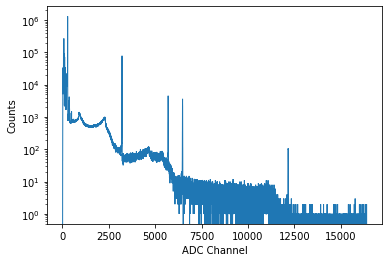

In [3]:
#%matplotlib widget
plt.hist(data[:,0], bins=2**14, range=(0,2**14), histtype='step')
plt.semilogy()
plt.xlabel(r'ADC Channel')
plt.ylabel(r'Counts')

In [4]:
ph = {'241am1': (128.8, 1.7), '241am2': (291.0, 1.8), '137cs': (3231.9, 2.8),
      '60co1': (5726.8, 3.6), '60co2': (6505.0, 3.7)}

In [5]:
cal = cl.EnergyCalibration(ph)
cal.set_polyorder(fnc='lin')#, initpars=[0,0.5])

In [6]:
cal.calibrate()

{'chisq/ndf': 0.12500510507300408,
 'p-value': 0.9453539823362043,
 'opt': {'p0': (-0.08026582827304118, 0.09155791797966022),
  'p1': (0.20484471527655146, 3.3450291049878554e-05)}}

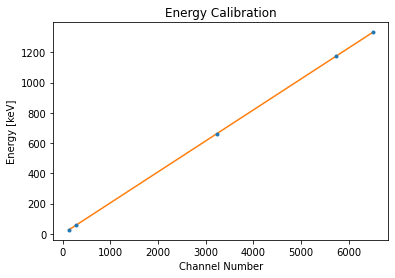

In [7]:
#%matplotlib widget
cal.plot_cal()

In [8]:
calVec = cal.apply_cal(data=data)
data

array([[2.31500000e+03, 4.74135250e+02, 4.29133589e+01, 1.85370881e-02],
       [9.80000000e+01, 1.99945163e+01, 2.05589766e+00, 2.09785476e-02],
       [3.21700000e+03, 6.58905183e+02, 4.97666864e+01, 1.54699056e-02],
       ...,
       [1.33000000e+03, 2.72363205e+02, 1.94586247e+01, 1.46305449e-02],
       [2.89000000e+02, 5.91198569e+01, 5.82023660e+00, 2.01392270e-02],
       [1.48700000e+03, 3.04523826e+02, 2.94316966e+01, 1.97926675e-02]])

Text(0, 0.5, 'Counts')

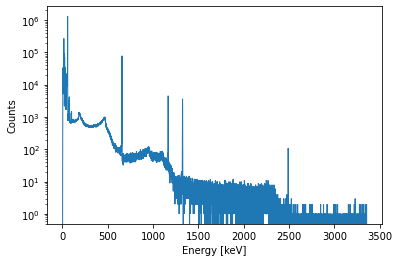

In [9]:
#%matplotlib widget
c, e, p = plt.hist(data[:,1], bins=calVec, histtype='step')
plt.semilogy()
plt.xlabel(r'Energy [keV]')
plt.ylabel(r'Counts')

In [10]:
peak = hf.HistogramFitter(c, e)

In [11]:
xlim = 640, 670

shape = 'hyper'
bkg = 'const'

pars = {'ngaus': 10**6,
        'mu'   : 659,
        'sigma': 1,
        'ntail': 10**3,
        'ttail': 1.5,
        'cstep': 50,
        'p0'   : 10**1}

In [12]:
peak.set_model((shape,bkg), xlim=xlim, initpars=pars)

In [13]:
peak.fit()

{'chisq/ndf': 1.9182874762863102,
 'p-value': 4.4508169953934007e-10,
 'opt': {'ngaus': (111652.84602227544, 173.50477955451584),
  'mu': (658.7755965678091, 0.0008822029845900892),
  'sigma': (0.5717701402849213, 0.0006370077099593),
  'ntail': (1093.5059061543006, 80.90619648991122),
  'ttail': (1.2957968402820947, 0.09467933951313227),
  'cstep': (21.701815911762118, 0.852404451477905),
  'p0': (52.50383657948654, 1.0960513431261616)}}

In [14]:
#peak.plot_fit()
#peak.plot_components()

In [15]:
peak.net_counts()

(112746.35192842974, 191.44116892331508)

In [16]:
peak.peak_width()

1.3540449910101415